# SHSS

## Required Equations
Without wind tunnel data you can only produce the plots. Each parameter plotted against $\beta$

### Variables

## Pilot's Data
- δr
- δa
- δFr
- δFa
- φ
- β

## Order of Analysis

## Python Code

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Constants

### Functions

In [26]:
def standardize_columns(df, column_mapping):
    # Rename columns based on the exact mapping
    df.rename(columns=column_mapping, inplace=True)
    return df

### Load Data

In [27]:
df_shss = pd.read_excel("./demo_data/demo_data.xlsx")

column_mapping = {
    # "Column Name in Excel": "Standardized Name"
    "δr": "delta_r",
    "δa": "delta_a",
    "δFr": "delta_Fr",
    "δFa": "delta_Fa",
    "φ": "phi",
    "β": "beta",
}

dfs = [standardize_columns(df, column_mapping) for df in [df_shss]]

### Data Analysis

#### Plot

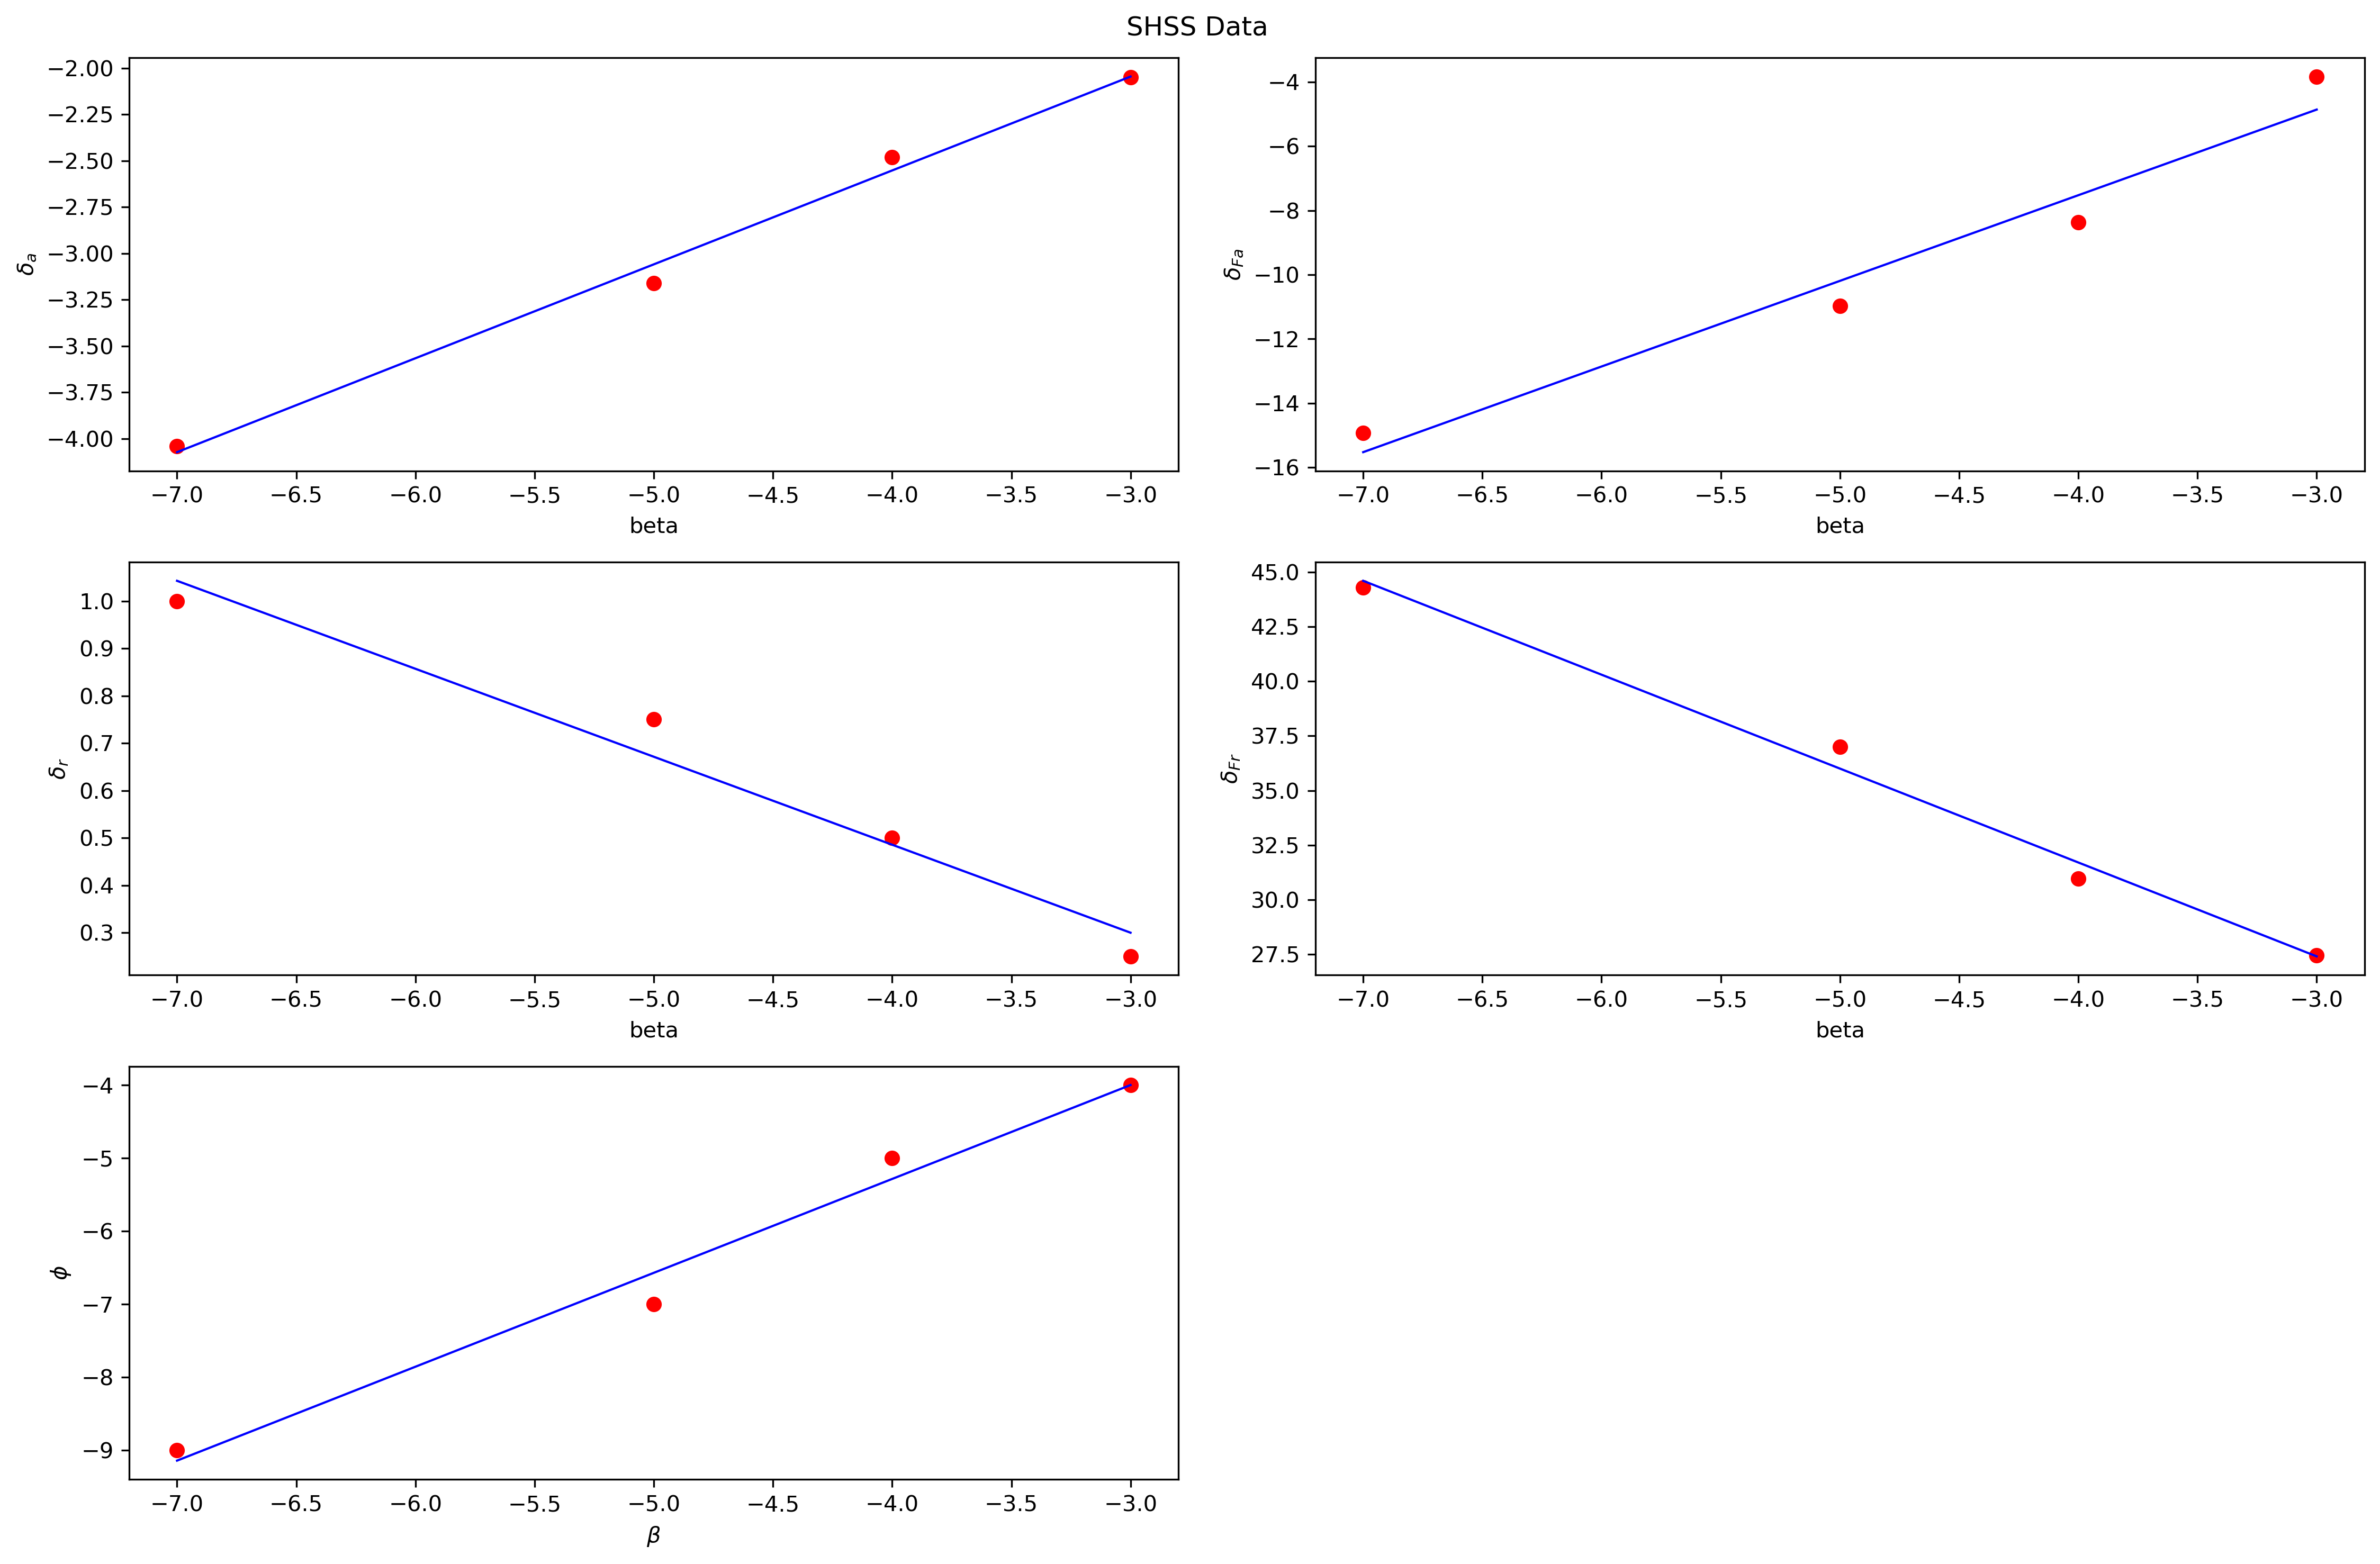

In [28]:
# Create the figure and a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10), dpi=300)  # Adjust figsize as needed

axs[0, 0].scatter(df_shss["beta"], df_shss["delta_a"], c="r", label="SHSS")
axs[0, 0].set_xlabel("beta")
axs[0, 0].set_ylabel(r"$\delta_a$")

axs[0, 1].scatter(df_shss["beta"], df_shss["delta_Fa"], c="r", label="SHSS")
axs[0, 1].set_xlabel("beta")
axs[0, 1].set_ylabel(r"$\delta_{Fa}$")

axs[1, 0].scatter(df_shss["beta"], df_shss["delta_r"], c="r", label="SHSS")
axs[1, 0].set_xlabel("beta")
axs[1, 0].set_ylabel(r"$\delta_r$")

axs[1, 1].scatter(df_shss["beta"], df_shss["delta_Fr"], c="r", label="SHSS")
axs[1, 1].set_xlabel("beta")
axs[1, 1].set_ylabel(r"$\delta_{Fr}$")

axs[2, 0].scatter(df_shss["beta"], df_shss["phi"], c="r", label="SHSS")
axs[2, 0].set_xlabel(r"$\beta$")
axs[2, 0].set_ylabel(r"$\phi$")

# Fit a linear line to each plot
parameters = ["delta_a", "delta_Fa", "delta_r", "delta_Fr", "phi"]
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    x = df_shss["beta"]
    y = df_shss[param]
    m, b = np.polyfit(x, y, 1)  # Perform linear fit
    axs[row, col].plot(x, m * x + b, color="blue", linestyle="-", linewidth=1)

axs[2, 1].axis("off")
plt.suptitle("SHSS Data")
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig("./output/plots/shss_plot.png")

for param in parameters:
    subfig = plt.figure(figsize=(10, 6), dpi=300)
    plt.scatter(df_shss["beta"], df_shss[param], c="r", label="SHSS")
    plt.xlabel("beta")
    latex_labels = {
        "delta_a": r"$\delta_a$",
        "delta_Fa": r"$\delta_{Fa}$",
        "delta_r": r"$\delta_r$",
        "delta_Fr": r"$\delta_{Fr}$",
        "phi": r"$\phi$"
    }

    plt.ylabel(latex_labels[param])
    plt.title(f"SHSS Data: {latex_labels[param]} vs Beta")
    x = df_shss["beta"]
    y = df_shss[param]
    m, b = np.polyfit(x, y, 1)  # Perform linear fit
    plt.plot(x, m * x + b, color="blue", linestyle="-", linewidth=1)
    plt.tight_layout()
    subfig.savefig(f"./output/plots/plot_{param} v Beta.png")
    plt.close(subfig)



